In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. Load the data file and explore the data, showing size, data descriptions,
data distributions with boxplot, pairplots

In [3]:
url = "/content/clusteringcsv.csv"

In [12]:
df0 = pd.read_csv(url)
# explore the data
df0.head()

,V0,V1,V2,V3,V4,V5,V6,V7,V8
0,ADT1_YEAST,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22
1,ADT2_YEAST,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22
2,ADT3_YEAST,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22
3,AAR2_YEAST,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22
4,AATM_YEAST,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22


In [19]:
df0.describe(include='all')

,V0,V1,V2,V3,V4,V5,V6,V7,V8
count,1484,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000
unique,1462,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,RL41_YEAST,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.500121,0.499933,0.500034,0.261186,0.504717,0.007500,0.499885,0.276199
std,NaN,0.137299,0.123924,0.086670,0.137098,0.048351,0.075683,0.057797,0.106491
min,NaN,0.110000,0.130000,0.210000,0.000000,0.500000,0.000000,0.000000,0.000000
25%,NaN,0.410000,0.420000,0.460000,0.170000,0.500000,0.000000,0.480000,0.220000
50%,NaN,0.490000,0.490000,0.510000,0.220000,0.500000,0.000000,0.510000,0.220000
75%,NaN,0.580000,0.570000,0.550000,0.320000,0.500000,0.000000,0.530000,0.300000


In [9]:
print("The dataset has {} number of samples and {} number of features".format(df0.shape[0] , df0.shape[1]))

The dataset has 1484 number of samples and 9 number of features


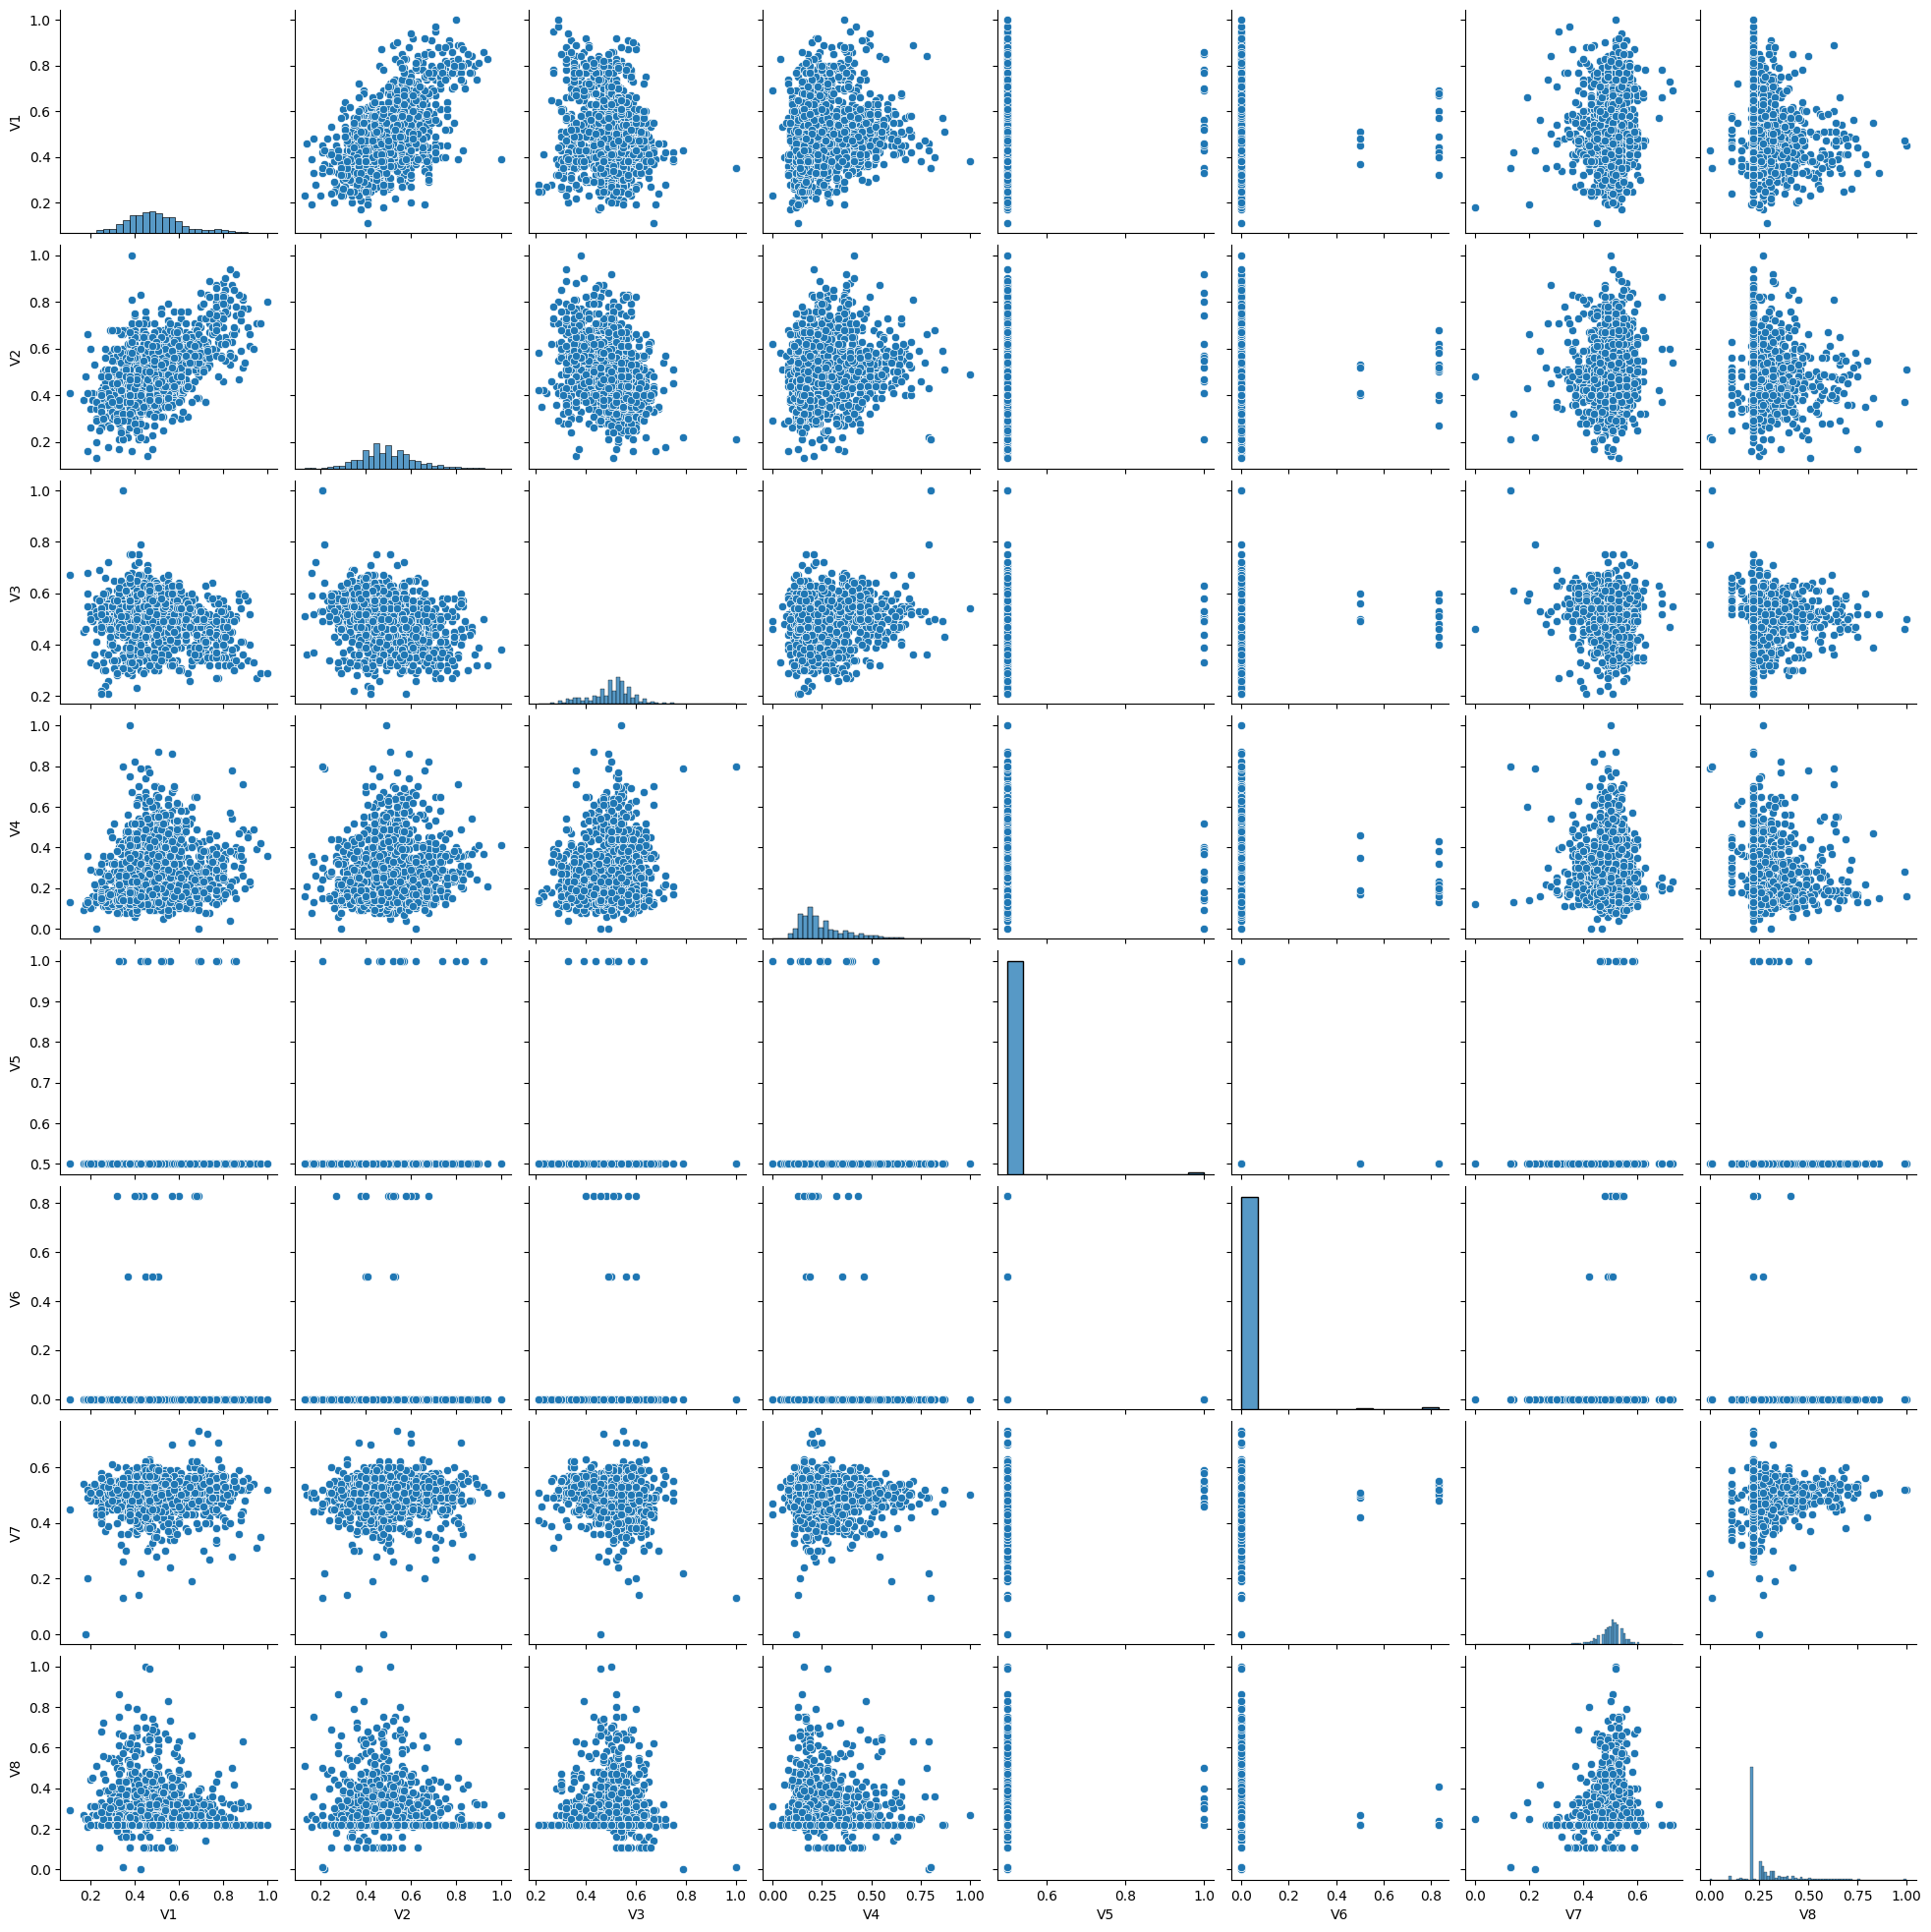

In [10]:
sns.pairplot(df0)
plt.show()

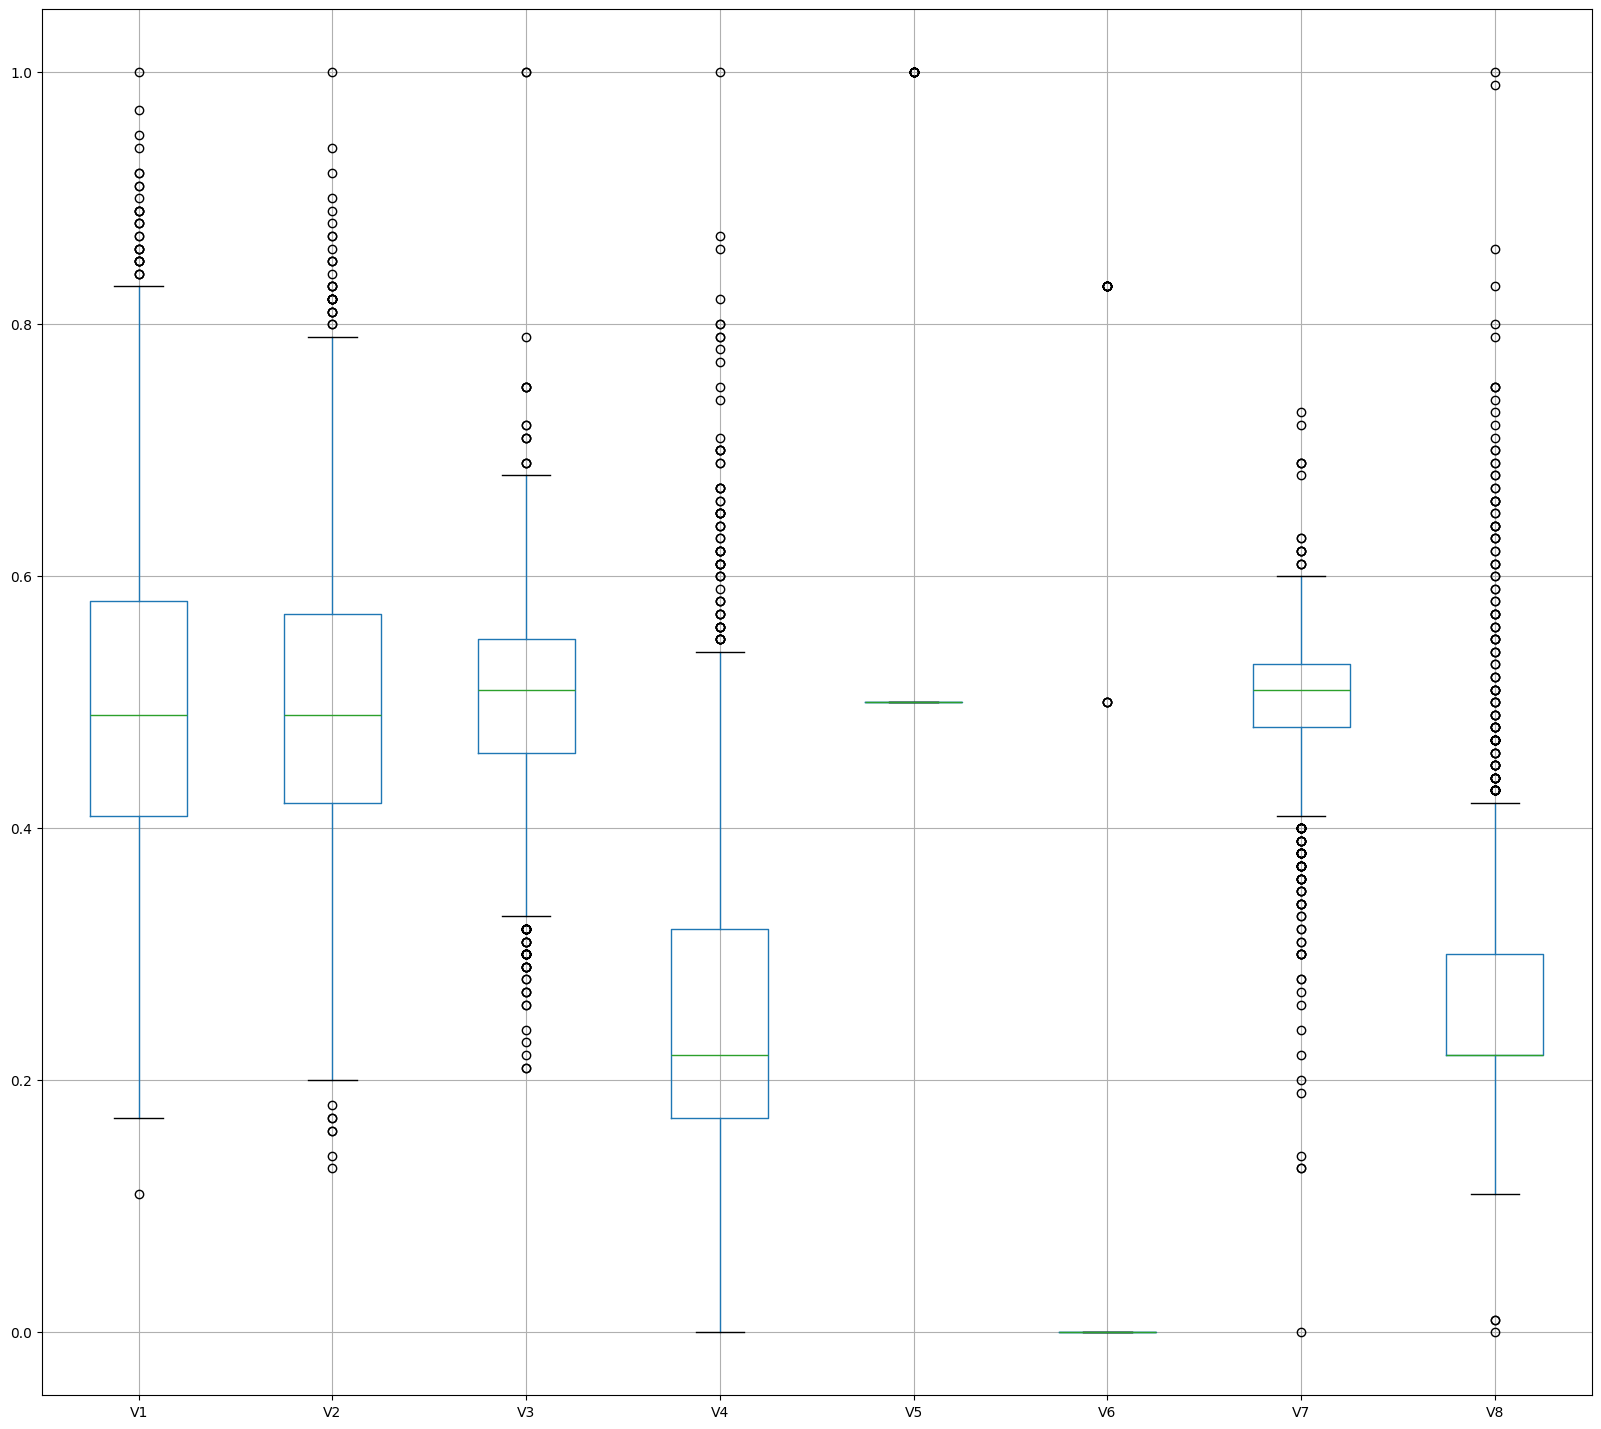

In [11]:
df0.boxplot(figsize=(20,18))
plt.show()

2. Comment the exploration of step 1 pointing out if there are imbalanced
distributions, outliers, missing values, non–numeric fields with number
of distinct values similar to the number of records

In [20]:
missing_values = df0.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 V0    0
V1    0
V2    0
V3    0
V4    0
V5    0
V6    0
V7    0
V8    0
dtype: int64


# **By looking into the distribution column**

### 1️ Missing Values

* `count` for all columns is 1484 → no missing values.
* Confirms what you saw earlier with `df.isnull().sum()`.

### 2️ Non-Numeric Columns

* `V0` is non-numeric and has `unique = 1462` → almost every row has a unique value.
* Confirms that this is an **ID column**, not useful for clustering.

### 3️ Imbalanced Distributions

Look at `mean`, `std`, `min`, `25%`, `50%`, `75%`, `max`:

* **V5**: min=0.5, 25%=0.5, 50%=0.5, 75%=0.5, max=1.0 → extremely imbalanced.
* **V6**: min=0.0, 25%=0.0, 50%=0.0, 75%=0.0, max=0.83 → extremely imbalanced.
* Other columns (`V1, V2, V3, V4, V7, V8`) are more evenly spread.

### 4️ Outliers

* Outliers can be inferred from `min` and `max` vs quartiles:

  * **V6**: max=0.83, Q3=0.0 → a few rare large values → outliers.
  * **V8**: max=1.0, Q3=0.3 → few high values → outliers.
* Boxplots from Step 1 will visualize these clearly.

### 5️ Summary for Clustering

* `V0` → drop (ID column).
* `V5`, `V6` → extremely skewed, may dominate clustering if not standardized.
* Remaining numeric columns are suitable for clustering after scaling.

---





 3. Drop the columns that are not relevant for the clustering operation, if
any, and explain why you do that.
Deal with missing values, if any

In my opinion , V0 column should be dropped because its an ID column and it does not contribute any meaningful to the clustering. As already seen there are no missing values, for the imbalanced dataset i would do powertransformation and minmaxcaling.

In [133]:
df = df0.drop('V0' , axis =1 ).copy()

In [134]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22


In [135]:
#lets do powertransformer and minmaxscaling
from sklearn.preprocessing import PowerTransformer , MinMaxScaler
pt = PowerTransformer()
x_pt = pd.DataFrame(pt.fit_transform(df), columns = df.columns)
mms = MinMaxScaler()
X = pd.DataFrame(mms.fit_transform(x_pt) , columns = x_pt.columns)


In [136]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8
0,0.678892,0.649636,0.280416,0.444130,0.0,0.0,0.337156,0.681562
1,0.514304,0.711131,0.292167,0.690987,0.0,0.0,0.427083,0.681562
2,0.735674,0.660113,0.303989,0.490024,0.0,0.0,0.427083,0.681562
3,0.678892,0.455788,0.401117,0.444130,0.0,0.0,0.447165,0.681562
4,0.501994,0.455788,0.292167,0.897265,0.0,0.0,0.337156,0.681562


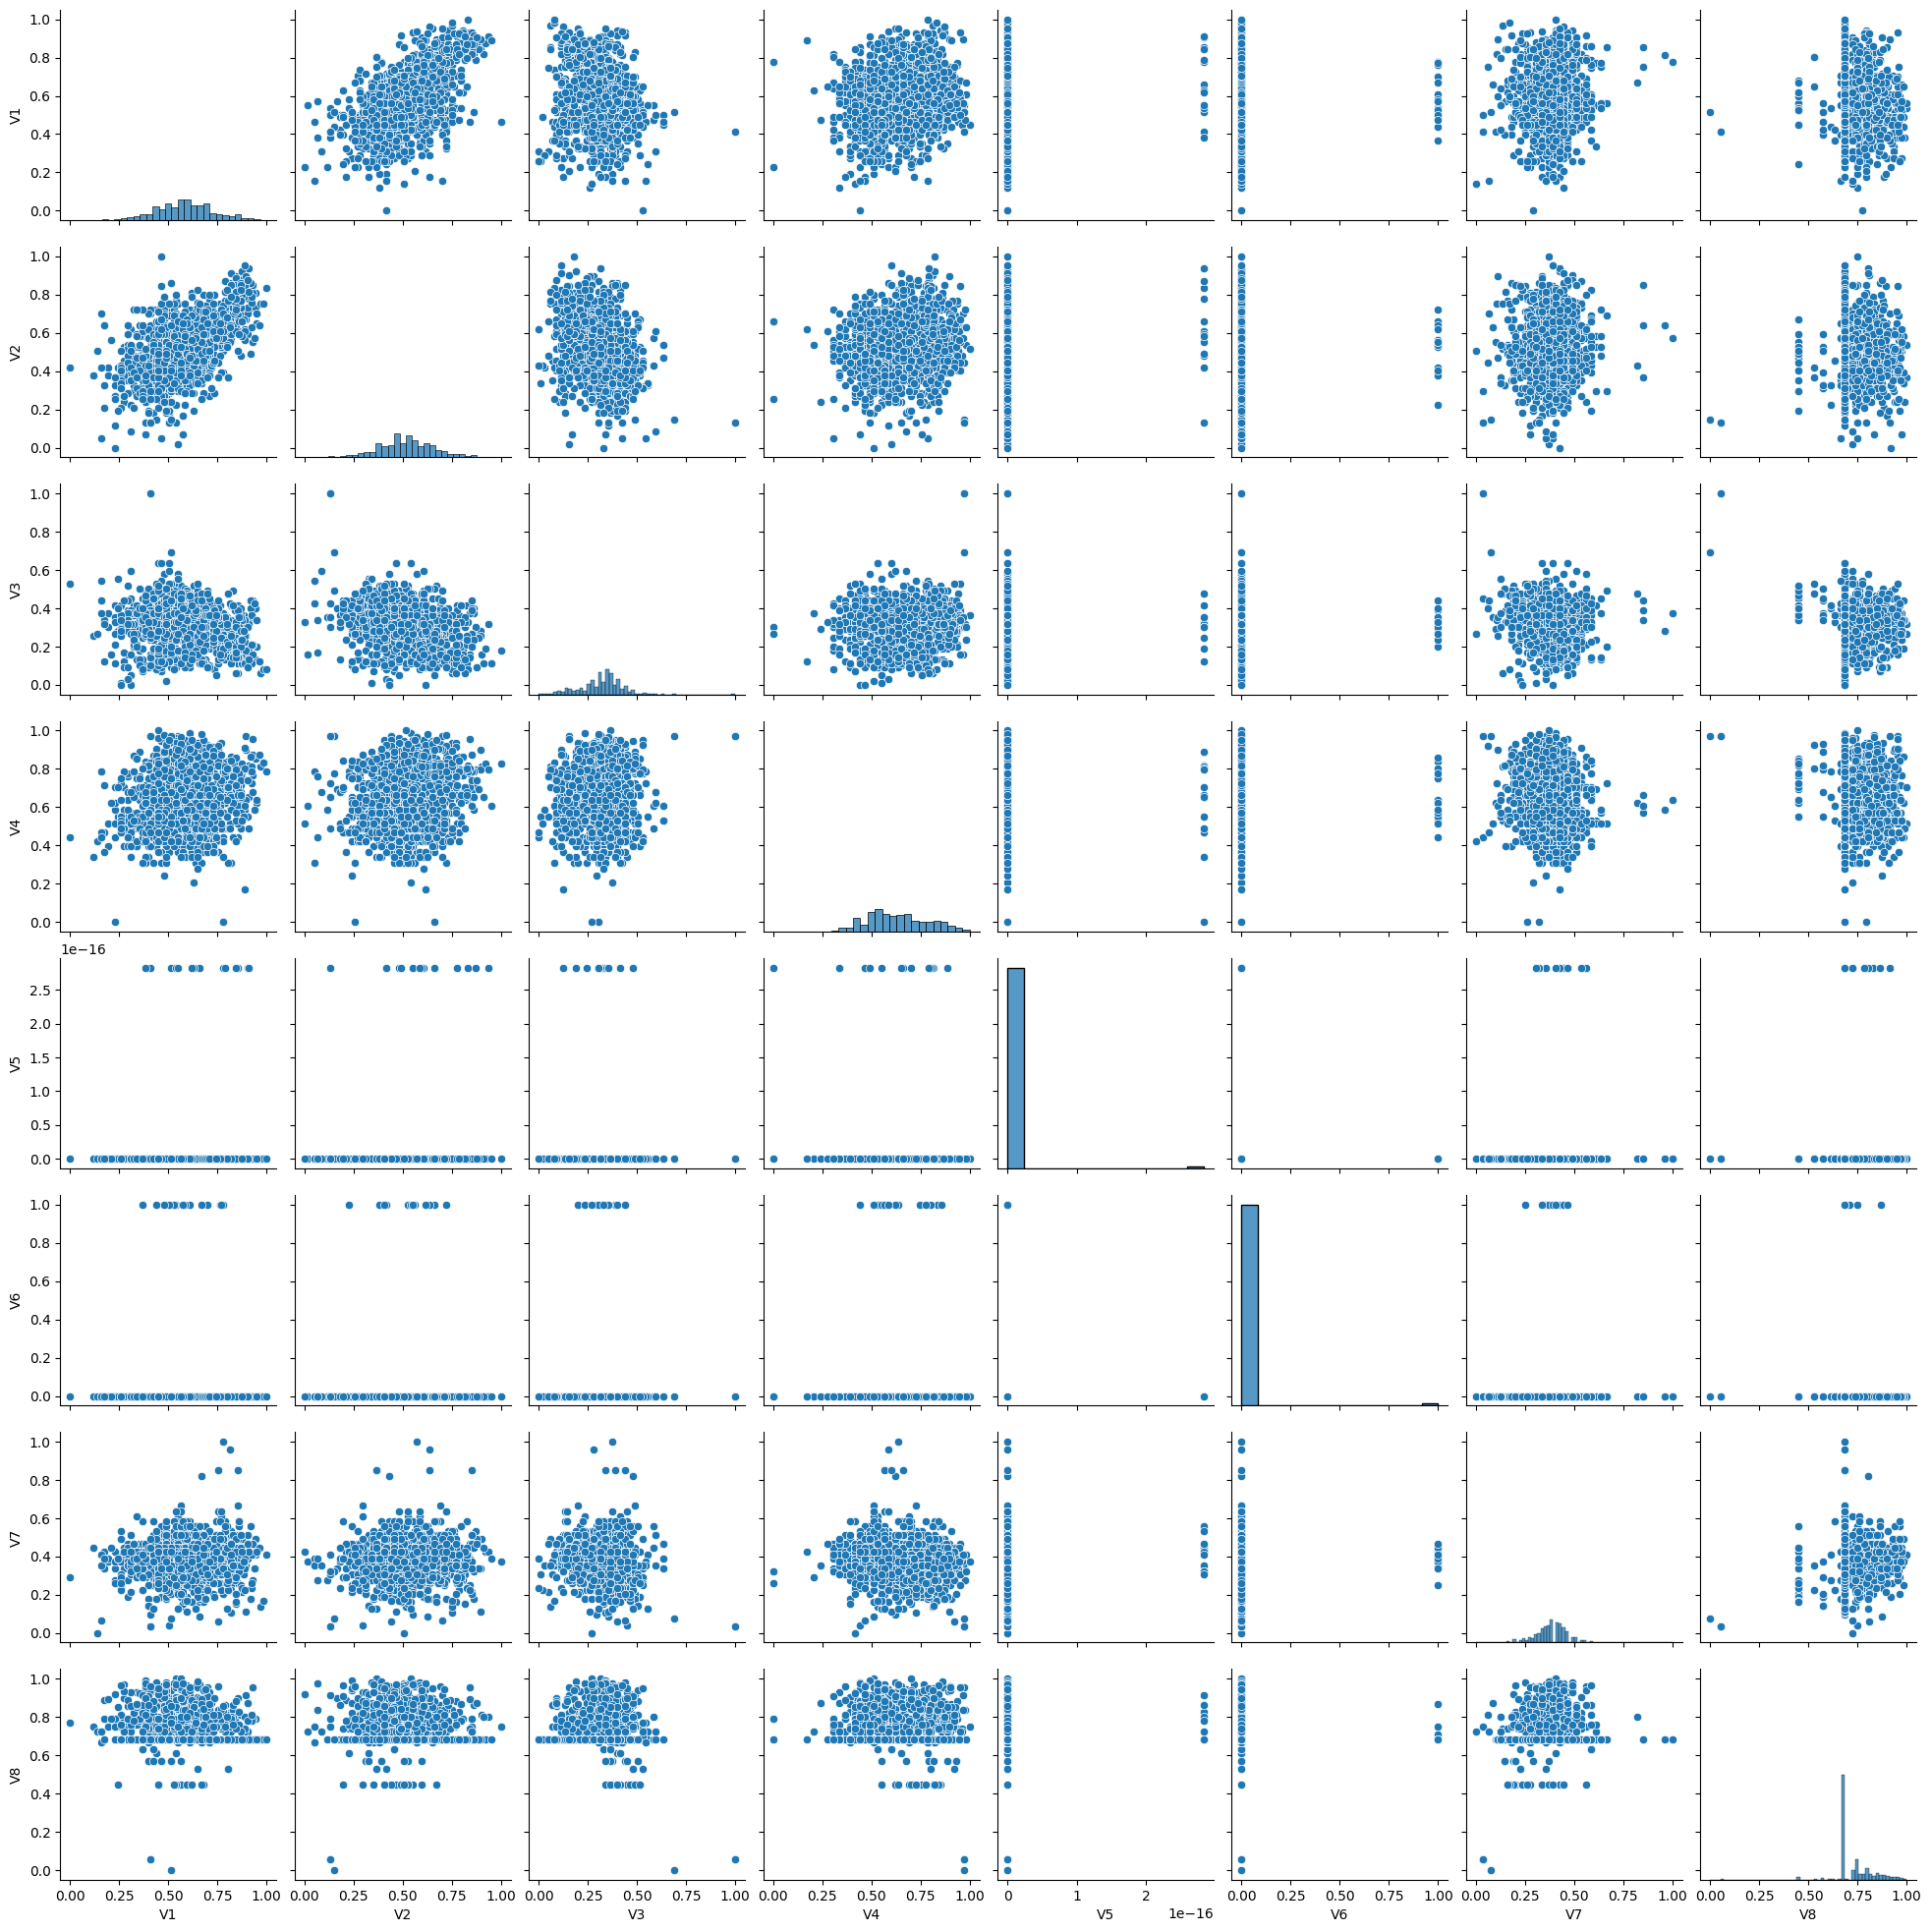

In [137]:
sns.pairplot(X)
plt.show()

4. find the best clustering scheme with KMeans, require not less than 3
clusters, show the hyperparameters, show the silhouette plots of clusters, show the distribution of the resulting cluster labels (e.g. histogram
or pie plot)

In [138]:
from sklearn.model_selection import ParameterGrid
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
k_range = list(range(3,11))
parameters = [{'n_clusters' : k_range}]
pg = list(ParameterGrid(parameters))
km_inertia = []
sil_score = []
for i in range(len(pg)):
  km = KMeans(**(pg[i]) , random_state=42)
  y_km = km.fit_predict(X)
  km_inertia.append(km.inertia_)
  sil_score.append(silhouette_score(X ,y_km))

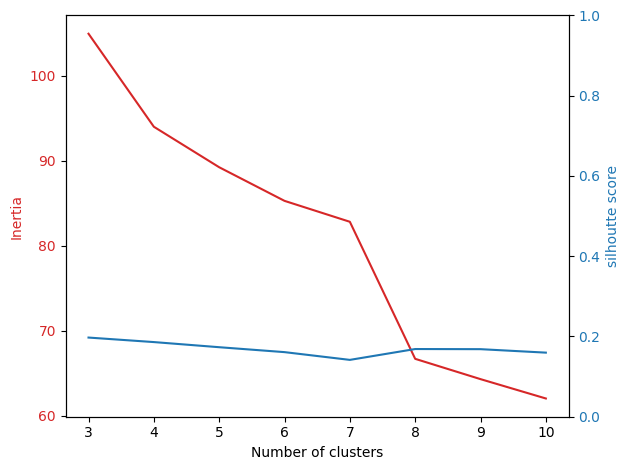

In [139]:
#plot inertias vs silhoutte score and do elbow method
import matplotlib.pyplot as plt
import numpy as np

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Inertia', color=color)
ax1.plot(k_range, km_inertia, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('silhoutte score', color=color)  # we already handled the x-label with ax1
ax2.plot(k_range, sil_score, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0,1)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

I am gonna chose k = 7 as the silhoutte score slightly peaks at k =7 and overall its a good tradeoff between inertia and silhoutte **score**

In [153]:
best_k = 7
y_bestk_model = KMeans(best_k , random_state=42)
y_km = y_bestk_model.fit_predict(X)

In [154]:
inertia = km_inertia[k_range.index(best_k)]
silhouttescore = sil_score[k_range.index(best_k)]
print(f"Silhoutte Score for k={best_k}: {silhouttescore}")
print(f"Inertia for k={best_k}: {inertia}")

Silhoutte Score for k=7: 0.14166278915849076
Inertia for k=7: 82.81569593684442


In [155]:
clust_size_km = np.unique(y_km, return_counts=True)
print(clust_size_km)

(array([0, 1, 2, 3, 4, 5, 6], dtype=int32), array([177, 297, 140, 158, 205, 293, 214]))


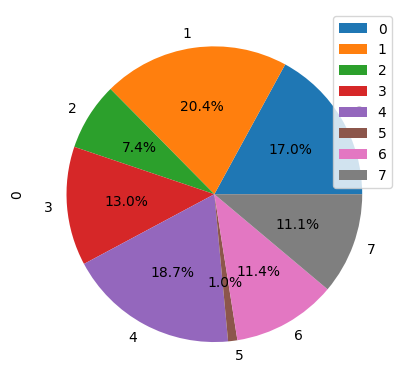

In [149]:
pd.DataFrame(clust_size_km[1]).plot.pie(y=0, autopct='%1.1f%%', );
plt.show()


5. find the best clustering scheme with Agglomerative Clustering or DBSCAN (your choice), require not less than 3 clusters, show the hyperparameters, show the silhouette plots of clusters, show the distribution
of the resulting cluster labels (e.g. histogram or pie plot)

In [164]:
from sklearn.cluster import AgglomerativeClustering
params = [{'n_clusters' : list(range(3,11)) , 'linkage': ['ward', 'complete', 'average', 'single']}]
pg_ac = list(ParameterGrid(params))

In [186]:
results_ac = []
for i in range(len(pg_ac)):
  ac = AgglomerativeClustering(**(pg_ac[i]))
  y_ac = ac.fit_predict(X)
  results_ac.append([ pg_ac[i]['linkage'] , pg_ac[i]['n_clusters'] , silhouette_score(X, y_ac)])
df_results_ac = pd.DataFrame(results_ac , columns = ['linkage' , 'n_clusters' , 'silhouette_score'])
df_results_ac.sort_values(by= 'silhouette_score' , ascending = False)


,linkage,n_clusters,silhouette_score
8,complete,3,0.617522
16,average,3,0.617522
24,single,3,0.617522
25,single,4,0.491938
17,average,4,0.432769
26,single,5,0.385601
27,single,6,0.384842
18,average,5,0.364163
28,single,7,0.349163
19,average,6,0.332270


Best clustering: n_clusters=3, linkage='complete', silhouette_score=0.618
Best clustering: n_clusters=3, linkage='average', silhouette_score=0.618
Single linkage often produces chaining effect and elongated clusters → not ideal.

In [197]:
print(df_results_ac.iloc[8])

linkage             complete
n_clusters                 3
silhouette_score    0.617522
Name: 8, dtype: object


now first lets do with average

In [198]:
ac = AgglomerativeClustering(n_clusters=3, linkage='complete')
y_ac = ac.fit_predict(X)

In [199]:
clust_sizes_ac = np.unique(y_ac, return_counts=True)
print(clust_sizes_ac)

(array([0, 1, 2]), array([1466,    3,   15]))


In [200]:
from sklearn.metrics import silhouette_score

# Final silhouette score
final_sil_score = silhouette_score(X, y_ac)

# Best parameters from your grid search
best_params = df_results_ac.iloc[8]  # contains linkage, n_clusters, silhouette_score

print("=== Final Agglomerative Clustering Results ===")
print(f"Number of clusters: {best_params.n_clusters}")
print(f"Linkage method: {best_params.linkage}")
print(f"Silhouette score from fit: {final_sil_score:.4f}")

=== Final Agglomerative Clustering Results ===
Number of clusters: 3
Linkage method: complete
Silhouette score from fit: 0.6175


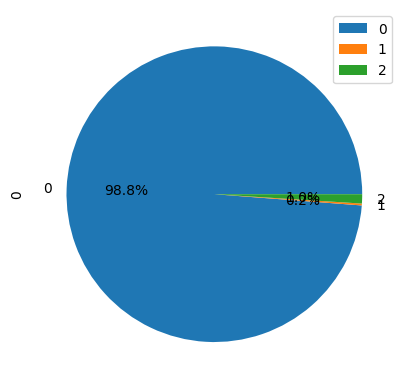

In [202]:
pd.DataFrame(clust_sizes_ac[1]).plot.pie(y=0, autopct='%1.1f%%', );
plt.show()


i am gonna try with dbscan


The default eps and min_samples params are: 0.5 and 5
Filtered DBSCAN results:


,eps,min_samples,n_clusters,sil,unclust%
182,0.191,6.0,2.0,0.632576,3.638814
175,0.186,5.0,2.0,0.632179,3.773585
181,0.191,5.0,2.0,0.632124,3.436658
174,0.186,4.0,2.0,0.631934,3.706199
180,0.191,4.0,2.0,0.631880,3.369272
...,...,...,...,...,...
746,0.561,3.0,3.0,0.617522,0.000000
753,0.566,2.0,3.0,0.617522,0.000000
754,0.566,3.0,3.0,0.617522,0.000000
761,0.571,2.0,3.0,0.617522,0.000000


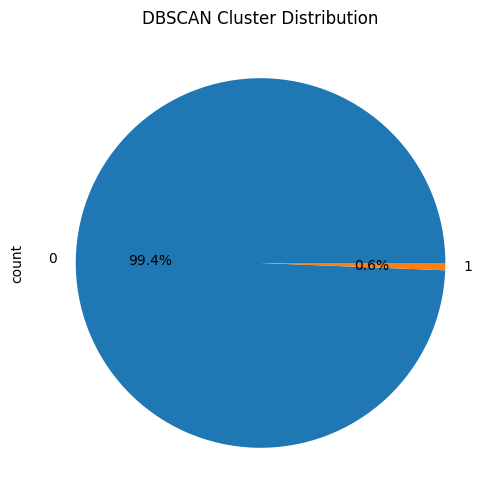

Silhouette score of the chosen DBSCAN clustering: 0.633


In [217]:
# ==============================
# Step 5: DBSCAN Clustering
# ==============================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid

# Assuming X is your preprocessed DataFrame from Step 3
# X = scaled dataframe after dropping 'V0', PowerTransformer + MinMaxScaler

# ------------------------------
# 1. Default DBSCAN check
# ------------------------------
db = DBSCAN()
y_db = db.fit_predict(X)
print("The default eps and min_samples params are:", db.eps, "and", db.min_samples)

# ------------------------------
# 2. Parameter grid for tuning
# ------------------------------
param_grid = {
    'eps': list(np.arange(0.001, 1, 0.005)),  # 0.001 to 1 step 0.005
    'min_samples': list(range(2, 10))        # 2 to 9
}

params = list(ParameterGrid(param_grid))

# ------------------------------
# 3. Prepare output dataframe
# ------------------------------
dbscan_out = pd.DataFrame(columns=['eps', 'min_samples', 'n_clusters', 'sil', 'unclust%'])

# ------------------------------
# 4. Loop over all parameter combinations
# ------------------------------
for p in params:
    db = DBSCAN(**p)
    y_db = db.fit_predict(X)

    # Compute number of clusters (excluding noise)
    cluster_labels_all = np.unique(y_db)
    cluster_labels = cluster_labels_all[cluster_labels_all != -1]  # ignore -1 (noise)
    n_clusters = len(cluster_labels)

    # Avoid trivial solutions (too few or too many clusters)
    if 1 < n_clusters < len(y_db):
        # Only consider clustered points for silhouette score
        X_cl = X[y_db != -1]
        y_db_cl = y_db[y_db != -1]
        sil = silhouette_score(X_cl, y_db_cl)

        # Percentage of points not clustered (labeled -1)
        uncl_p = (1 - y_db_cl.shape[0] / y_db.shape[0]) * 100

        # Append results to dataframe
        dbscan_out.loc[len(dbscan_out)] = [p['eps'], p['min_samples'], n_clusters, sil, uncl_p]

# ------------------------------
# 5. Filter results based on thresholds
# ------------------------------
sil_thr = 0.5       # silhouette score threshold
unc_thr = 10        # max 10% points unclustered
n_clu_max_thr = 5   # max 5 clusters

best_results = dbscan_out[
    (dbscan_out['sil'] >= sil_thr) &
    (dbscan_out['unclust%'] <= unc_thr) &
    (dbscan_out['n_clusters'] <= n_clu_max_thr)
].sort_values(['sil', 'unclust%'], ascending=[False, True])

print("Filtered DBSCAN results:")
display(best_results)

# ------------------------------
# 6. Choose best parameters (example)
# ------------------------------
best_params = {'eps': 0.191, 'min_samples': 6}  # from filtered results
db = DBSCAN(**best_params)
y_db = db.fit_predict(X)

# ------------------------------
# 7. Cluster size and distribution
# ------------------------------
cluster_labels, counts = np.unique(y_db[y_db != -1], return_counts=True)  # exclude noise
pd.DataFrame(counts, index=cluster_labels, columns=['count']).plot.pie(
    y='count', autopct='%1.1f%%', legend=False, figsize=(6,6), title='DBSCAN Cluster Distribution'
)
plt.show()

# ------------------------------
# 8. Optional: silhouette score for chosen parameters
# ------------------------------
X_cl = X[y_db != -1]
y_cl = y_db[y_db != -1]
sil_score_final = silhouette_score(X_cl, y_cl)
print(f"Silhouette score of the chosen DBSCAN clustering: {sil_score_final:.3f}")
